In [3]:
!pip install xlrd

import pandas as pd

# Read Excel file from URL
url = "https://api.worldbank.org/v2/en/indicator/SM.POP.NETM?downloadformat=excel"
net_migration = pd.read_excel(url)

Shape of filtered data: (1, 68)


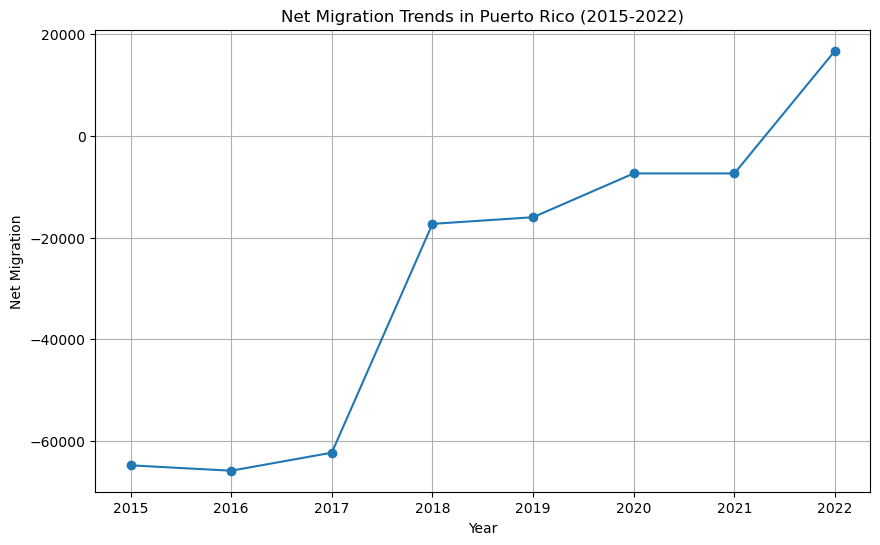

In [4]:
# Display the first few rows of the DataFrame
net_migration.head(5)

# Filter data related to Puerto Rico
net_pr = net_migration[net_migration["Data Source"] == "Puerto Rico"]

# Display the filtered DataFrame
net_pr

# Check the shape of the filtered DataFrame
print("Shape of filtered data:", net_pr.shape)

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
columns = ["Unnamed: 59", "Unnamed: 60",  "Unnamed: 61", "Unnamed: 62",  "Unnamed: 63",  "Unnamed: 64",  "Unnamed: 65",  "Unnamed: 66"]

# Check if each year column exists in the DataFrame columns and rename if found
for year, column in zip(years, columns):
    if column in net_pr.columns:
        net_pr = net_pr.rename(columns={column: year})

# This will change the 'Unnamed' columns to their respective year if available

# Display the DataFrame after renaming columns
net_pr

# Define the columns to drop
columns_to_drop = ["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9",
                   "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15",
                   "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21",
                   "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25", "Unnamed: 26", "Unnamed: 27",
                   "Unnamed: 28", "Unnamed: 29", "Unnamed: 30", "Unnamed: 31", "Unnamed: 32", "Unnamed: 33",
                   "Unnamed: 34", "Unnamed: 35", "Unnamed: 36", "Unnamed: 37", "Unnamed: 38", "Unnamed: 39",
                   "Unnamed: 40", "Unnamed: 41", "Unnamed: 42", "Unnamed: 43", "Unnamed: 44", "Unnamed: 45",
                   "Unnamed: 46", "Unnamed: 47", "Unnamed: 48", "Unnamed: 49", "Unnamed: 50", "Unnamed: 51",
                   "Unnamed: 52", "Unnamed: 53", "Unnamed: 54", "Unnamed: 55", "Unnamed: 56", "Unnamed: 57",
                   "Unnamed: 58", "Unnamed: 67"]

# Drop only the columns that exist in the DataFrame
net_pr = net_pr.drop(columns=[col for col in columns_to_drop if col in net_pr.columns])
net_pr

import matplotlib.pyplot as plt

# Data
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
net_migration = [-64764.0, -65824.0, -62275.0, -17320.0, -16013.0, -7408.0, -7408.0, 16702.0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, net_migration, marker='o', linestyle='-')

# Title and labels
plt.title('Net Migration Trends in Puerto Rico (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Net Migration')

# Grid
plt.grid(True)

# Show plot
plt.show()

In [5]:
import requests
import json

# Base URL and API Key
base_url = 'https://api.census.gov/data/{year}/acs/acs5'
api_key = '0b469f004b2b59ca7d0d9efd05c9623dd90354fb'

# Variables as per the API Guide
variables = {
    'total_population': 'B01003_001E',  # Total population
    'median_age': 'B01002_001E',  # Median age (approximation for average age)
}

# Geographic location for Puerto Rico
geo = 'state:72'

# Years of interest
years = list(range(2015, 2023))

# Function to fetch data for a given year
def fetch_data(year):
    url = base_url.format(year=year)
    params = {
        'get': ','.join(variables.values()),
        'for': geo,
        'key': api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return f'Error fetching data: {response.text}'

# Function to process all years and return structured data
def get_all_years_data():
    all_data = {}
    for year in years:
        result = fetch_data(year)
        if isinstance(result, str):
            all_data[year] = result
        else:
            # Extract the headers and the data
            headers = result[0]
            data = result[1]
            all_data[year] = dict(zip(headers, data))
    return all_data

# Example of fetching and printing the data
data = get_all_years_data()
print(data)


{2015: {'B01003_001E': '3583073', 'B01002_001E': '38.7', 'state': '72'}, 2016: {'B01003_001E': '3529385', 'B01002_001E': '39.4', 'state': '72'}, 2017: {'B01003_001E': '3468963', 'B01002_001E': '40.1', 'state': '72'}, 2018: {'B01003_001E': '3386941', 'B01002_001E': '40.9', 'state': '72'}, 2019: {'B01003_001E': '3318447', 'B01002_001E': '41.7', 'state': '72'}, 2020: {'B01003_001E': '3255642', 'B01002_001E': '42.4', 'state': '72'}, 2021: {'B01003_001E': '3311274', 'B01002_001E': '43.1', 'state': '72'}, 2022: {'B01003_001E': '3272382', 'B01002_001E': '43.7', 'state': '72'}}


In [6]:
import pandas as pd

# Load the CSV files into DataFrames
data_2022 = pd.read_csv('2022.csv')
data_2021 = pd.read_csv('2021.csv')
data_2020 = pd.read_csv('2020.csv')
data_2019 = pd.read_csv('2019.csv')
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')  

# Define the age groups to keep in the dataset
age_groups = [
    "Under 5 years", "5 to 9 years", "10 to 14 years", 
    "15 to 19 years", "20 to 24 years", "25 to 29 years", "30 to 34 years"
]

# Function to filter data based on age groups
def filter_data(data):
    return data[data['Label (Grouping)'].str.strip().isin(age_groups)]

# Apply the filter to each dataset
filtered_2022 = filter_data(data_2022)
filtered_2021 = filter_data(data_2021)
filtered_2020 = filter_data(data_2020)
filtered_2019 = filter_data(data_2019)
filtered_2018 = filter_data(data_2018)
filtered_2017 = filter_data(data_2017)
filtered_2016 = filter_data(data_2016)
filtered_2015 = filter_data(data_2015)

# Print the filtered data (example for one year, you can do this for others as needed)
print(filtered_2022)
print(filtered_2021)
print(filtered_2020)
print(filtered_2019)
print(filtered_2018)
print(filtered_2017)
print(filtered_2016)
print(filtered_2015)

         Label (Grouping) Puerto Rico!!Total!!Estimate
2           Under 5 years                      112,877
3            5 to 9 years                      151,228
4          10 to 14 years                      184,643
5          15 to 19 years                      201,868
6          20 to 24 years                      221,373
7          25 to 29 years                      222,338
8          30 to 34 years                      198,580
         Label (Grouping) Puerto Rico!!Total!!Estimate
2           Under 5 years                      122,415
3            5 to 9 years                      159,264
4          10 to 14 years                      193,155
5          15 to 19 years                      210,295
6          20 to 24 years                      227,033
7          25 to 29 years                      224,008
8          30 to 34 years                      195,204
         Label (Grouping) Puerto Rico!!Total!!Estimate
2           Under 5 years                      130,964
3         

In [7]:
# Define the age groups to keep in the dataset
age_groups = [
    "Under 5 years", "5 to 9 years", "10 to 14 years", 
    "15 to 19 years", "20 to 24 years", "25 to 29 years", "30 to 34 years"
]

# Function to filter data and rename columns based on year
def filter_and_rename(data, year):
    filtered_data = data[data['Label (Grouping)'].str.strip().isin(age_groups)]
    filtered_data = filtered_data.rename(columns={'Puerto Rico!!Total!!Estimate': f'Total {year}'})
    return filtered_data

In [8]:
# Load the CSV files into DataFrames
data_2022 = pd.read_csv('2022.csv')
data_2021 = pd.read_csv('2021.csv')
data_2020 = pd.read_csv('2020.csv')
data_2019 = pd.read_csv('2019.csv')
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')  # Corrected the file name here

# Apply the filter and rename columns for each dataset
filtered_2022 = filter_and_rename(data_2022, 2022)
filtered_2021 = filter_and_rename(data_2021, 2021)
filtered_2020 = filter_and_rename(data_2020, 2020)
filtered_2019 = filter_and_rename(data_2019, 2019)
filtered_2018 = filter_and_rename(data_2018, 2018)
filtered_2017 = filter_and_rename(data_2017, 2017)
filtered_2016 = filter_and_rename(data_2016, 2016)
filtered_2015 = filter_and_rename(data_2015, 2015)

In [10]:
def sum_population_for_year(df):
    year = df.columns[1].split()[1]  # Extract year from column name 'Total {year}'
    # Ensure all non-numeric characters are removed before conversion
    total_population = df[df.columns[1]].replace('[^0-9]', '', regex=True).astype(int).sum()
    return year, total_population

# Example usage for each year:
try:
    year_2022, total_2022 = sum_population_for_year(filtered_2022)
    year_2021, total_2021 = sum_population_for_year(filtered_2021)
    year_2020, total_2020 = sum_population_for_year(filtered_2020)
    year_2019, total_2019 = sum_population_for_year(filtered_2019)
    year_2018, total_2018 = sum_population_for_year(filtered_2018)
    year_2017, total_2017 = sum_population_for_year(filtered_2017)
    year_2016, total_2016 = sum_population_for_year(filtered_2016)
    year_2015, total_2015 = sum_population_for_year(filtered_2015)

    # Print the totals for each year
    print(f"Total population for ages 0 - 35: {year_2022}: {total_2022}")
    print(f"Total population for ages 0 - 35: {year_2021}: {total_2021}")
    print(f"Total population for ages 0 - 35: {year_2020}: {total_2020}")
    print(f"Total population for ages 0 - 35: {year_2019}: {total_2019}")
    print(f"Total population for ages 0 - 35: {year_2018}: {total_2018}")
    print(f"Total population for ages 0 - 35: {year_2017}: {total_2017}")
    print(f"Total population for ages 0 - 35: {year_2016}: {total_2016}")
    print(f"Total population for ages 0 - 35: {year_2015}: {total_2015}")
except Exception as e:
    print(f"An error occurred: {e}")


Total population for ages 0 - 35: 2022: 1292907
Total population for ages 0 - 35: 2021: 1331374
Total population for ages 0 - 35: 2020: 1332495
Total population for ages 0 - 35: 2019: 1385684
Total population for ages 0 - 35: 2018: 1444595
Total population for ages 0 - 35: 2017: 1512300
Total population for ages 0 - 35: 2016: 1567047
Total population for ages 0 - 35: 2015: 1623132
